# ```Team_14```

* Kalyana Sundaram - CB.EN.U4AIE21120
* Kaushik Jonnada - CB.EN.U4AIE21122
* Praneetha K - CB.EN.U4AIE21147
* Sarvesh ShashiKumar - CB.EN.U4AIE21163
* Subikksha - CB.EN.U4AIE21167
# Question 1
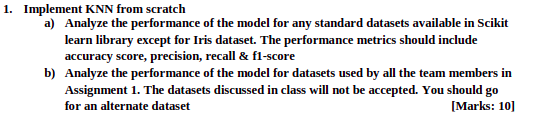

In [79]:
import sklearn
import numpy as np
import operator
from tqdm import tqdm
import pandas as pd

In [80]:
class KNeighborsClassifier():
    '''The class for using K Nearest Neighbours for classification tasks
    
       Args:
           n_neighbors: The number of nearby points considered'''
    
    def __init__(self, n_neighbors=5): # this is the constructor
        self.neighbors = n_neighbors
    
    def euclidian_dist(self, point_1, point_2): # a function to calculate the euclidian distance
        dist = 0.0
        for i in range(len(point_1) - 1): # -1 because the last element is the class
            dist += pow(point_1[i] - point_2[i], 2) #using the pow function to calculate the power of a number as the distance is the square root of the sum of the squares of the differences
        return np.sqrt(dist)
    
    def calc_distances(self, data, new_point):
        distances = []
        neighbors = []
        for i in data:
            distances.append((i, self.euclidian_dist(new_point, i))) #appending the distance to the list
        distances.sort(key=operator.itemgetter(1)) #sorting the list by the second element of the tuple
        for i in range(self.neighbors): #getting the first k elements of the list
            neighbors.append(distances[i][0]) #appending the first k elements of the list to the neighbors list
        return neighbors
    
    def find_majority(self, neighbors, train_X, train_y): #a function to find the majority class
        iter_y = []
        for i in neighbors:
            iter_y.append(train_y[np.where(train_X == i)[0][0]]) #getting the index of the element in the train_X list and then getting the class from the train_y list
        return max(iter_y)
    
    def fit(self, train_X, train_y):
        set_of_classes = set(train_y) #getting the set of classes
        self.classes = 0; #initializing the number of classes
        for i in tqdm(set_of_classes): #iterating through the set of classes
            self.classes += 1
        self.X = train_X
        self.y = train_y
        self.data_len = len(train_X) #getting the length of the data
        
    def predict(self, test_y):
        y_pred = []
        neighbors = []
        for i in tqdm(test_y): #iterating through the test data
            neighbors = self.calc_distances(self.X, i)  #getting the neighbors using the calc_distances function
            y_pred.append(self.find_majority(neighbors, self.X, self.y)) #getting the majority class using the find_majority function
        return y_pred


In [81]:
def scores(y_true, y_pred):
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
    print("Accuracy ",accuracy_score(y_test, y_pred))
    print("Precision_score",precision_score(y_test, y_pred, average='macro') )
    print("Recall_score",recall_score(y_test, y_pred, average='macro') )
    print("F1_score",f1_score(y_test, y_pred, average='macro') )


In [82]:
data = load_breast_cancer()

X = data.data
y = data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

scores(y_test, y_pred)

100%|██████████| 114/114 [00:00<00:00, 173.98it/s]

Accuracy  0.6491228070175439
Precision_score 0.8198198198198199
Recall_score 0.5348837209302325
F1_score 0.45532728141423795


Dataset of Praneetha - CB.EN.U4AIE21147

In [83]:
data = pd.read_csv('/home/kalyan/gitrepo/alma-mater/Sem3/PML/Assignment2/Datasets/echocardiogram.csv',sep=',')
data = data.dropna()
#missing value treatment
data = data.dropna()
data1 = data
#remove name column
data1 = data1.drop('name',axis=1)
data1.head()
np.random.seed(1234)
index = np.random.choice(np.arange(data1.shape[0]), size=int(data1.shape[0]*0.5))
train = data1.iloc[index]
test = data1.iloc[-index]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data1.iloc[:, :-1].values
y = data1.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

scores(y_test, y_pred)



100%|██████████| 31/31 [00:00<00:00, 3956.77it/s]

Accuracy  0.7096774193548387
Precision_score 0.3548387096774194
Recall_score 0.5
F1_score 0.41509433962264153



/home/kalyan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dataset of Kalyana Sundaram - CB.EN.U4AIE21120

In [84]:
data = pd.read_csv('/home/kalyan/gitrepo/alma-mater/Sem3/PML/Assignment2/Datasets/Dropout_Academic Success - Sheet1.csv',sep=',')
#missing value treatment
data = data.dropna()

#target column is what we want to predict
target = data['Target']
target

#we assign 1 for Graduate and 0 for Dropout
target = target.replace('Graduate',1)
target = target.replace('Dropout',0)

#model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

scores(y_test, y_pred)



(2212, 36) (2212, 36) (2212,) (2212,)


100%|██████████| 2212/2212 [01:13<00:00, 30.22it/s]

Accuracy  0.4914104882459313
Precision_score 0.1638034960819771
Recall_score 0.3333333333333333
F1_score 0.21966252399717087



/home/kalyan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DataSet of Sarvesh Shashikumar - CB.EN.U4AIE21163

In [85]:
import cv2
#import paths
from imutils import paths
import os
import numpy as np
def createImageFeatures(image, size=(32, 32)):
    # resize the image
    image = cv2.resize(image, size)

    # flatten the image
    pixel_list = image.flatten()
    return pixel_list

print("Reading all images")
image_paths = list(paths.list_images("/home/kalyan/DataSets/Dogs&Cats/train"))
raw_images = []
labels = []

#take randomly 100 images of cats and dogs 
np.random.seed(42)
image_paths = np.random.choice(image_paths, size=(100), replace=False)

# loop over the input images
for (i, image_path) in enumerate(image_paths):
    image = cv2.imread(image_path)
    label = image_path.split(os.path.sep)[-1].split(".")[0]
    # extract raw pixel intensity "features
    pixels = createImageFeatures(image)
    raw_images.append(pixels)
    labels.append(label)

print("Number of images: {}".format(len(raw_images)))
raw_images = np.array(raw_images)
labels = np.array(labels)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(raw_images, labels, test_size=0.8)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

scores(y_test, y_pred)


Reading all images
Number of images: 100
(20, 3072) (80, 3072) (20,) (80,)


  0%|          | 0/80 [00:00<?, ?it/s]/tmp/ipykernel_340562/4067412935.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  dist += pow(point_1[i] - point_2[i], 2) #using the pow function to calculate the power of a number as the distance is the square root of the sum of the squares of the differences
100%|██████████| 80/80 [00:09<00:00,  8.50it/s]

Accuracy  0.4875
Precision_score 0.24375
Recall_score 0.5
F1_score 0.3277310924369748



/home/kalyan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DataSet of Subikksha - CB.EN.U4AIE21167

In [86]:
data = pd.read_csv('/home/kalyan/gitrepo/alma-mater/Sem3/PML/Assignment2/Datasets/Disease.csv',sep=',')
#print all classes in prognosis
classes = (data['prognosis'].unique())

class_dict = {}
for i in range(len(classes)):
    class_dict[classes[i]] = i

data['prognosis'] = data['prognosis'].map(class_dict)

#drop Unnamed: 133 column
data = data.drop('Unnamed: 133',axis=1)
data

#given symptoms predict the probable disease
symptoms = data.columns[:-1]
symptoms

#model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

scores(y_test, y_pred)


(984, 132) (3936, 132) (984,) (3936,)


100%|██████████| 3936/3936 [03:22<00:00, 19.45it/s]

Accuracy  0.024390243902439025
Precision_score 0.000594883997620464
Recall_score 0.024390243902439025
F1_score 0.0011614401858304297



/home/kalyan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DataSet of Kaushik Jonnada - CB.EN.U4AIE21122

In [87]:
#loading data
data = pd.read_csv('/home/kalyan/gitrepo/alma-mater/Sem3/PML/Assignment2/Datasets/kr-vs-kp.data',sep=',')
data.head()

#missing value treatment
data = data.dropna()
data

#won = 1, nowin = 0
data['won'] = data['won'].replace('won',1)
data['won'] = data['won'].replace('nowin',0)

#settings all f to 1 and t to 0
data = data.replace('f',1)
data = data.replace('t',0)

#changing values with l to 1 and g to 0
data = data.replace('l',1)
data = data.replace('g',0)

#changing values with n to 1 and b to 0 and w to 2
data = data.replace('n',1)
data = data.replace('b',0)
data = data.replace('w',2)

#model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

scores(y_test, y_pred)

(639, 36) (2556, 36) (639,) (2556,)


100%|██████████| 2556/2556 [00:24<00:00, 102.88it/s]
/home/kalyan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy  0.5230829420970265
Precision_score 0.2615414710485133
Recall_score 0.5
F1_score 0.3434369380940149


# Question 2
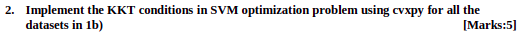

In [ ]:
import numpy as np
import cvxpy as cp
import pandas as pd

def sv_cvxpy(X, y, c):
    m, n = X.shape # m: number of samples, n: number of features
    w = cp.Variable(n) # n-dimensional vector
    b = cp.Variable() # scalar
    '''c*cp.sum(cp.pos(1 - y * (X @ w + b))) is the hinge loss function
    cp.square(cp.norm(w)) is the L2 norm of w'''
    obj = cp.Minimize(0.5 * cp.square(cp.norm(w)) + c * cp.sum(cp.pos(1 - y * (X @ w + b)))) 
    prob = cp.Problem(obj)
    prob.solve()
    print("status:", prob.status)
    return w.value, b.value

Kaushik Jonnada - CB.EN.U4AIE21122

In [ ]:
#loading data
data = pd.read_csv('/home/kalyan/gitrepo/alma-mater/Sem3/PML/kr-vs-kp.data',sep=',')
data.head()

#missing value treatment
data = data.dropna()
data

#won = 1, nowin = 0
data['won'] = data['won'].replace('won',1)
data['won'] = data['won'].replace('nowin',0)

#settings all f to 1 and t to 0
data = data.replace('f',1)
data = data.replace('t',0)

#changing values with l to 1 and g to 0
data = data.replace('l',1)
data = data.replace('g',0)

#changing values with n to 1 and b to 0 and w to 2
data = data.replace('n',1)
data = data.replace('b',0)
data = data.replace('w',2)

#model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

c = 1
w, b = sv_cvxpy(X, y, c)
print(w, b)



[6.53017565e-06 6.82024811e-06 7.17765163e-06 6.63689637e-06
 5.06616649e-06 3.53679183e-06 5.25158308e-06 6.43191498e-06
 4.88917629e-06 6.35496397e-06 4.00158611e-06 6.54725688e-06
 5.42817124e-06 7.32626332e-06 8.46224615e-06 7.21163605e-06
 7.09690076e-06 2.91436233e-06 7.24985718e-06 6.23517350e-06
 4.82437695e-06 5.62175047e-06 7.05863179e-06 4.43940816e-06
 7.31777612e-06 2.45667863e-06 7.13940785e-06 7.32626332e-06
 7.32626332e-06 6.96929138e-06 5.73777590e-06 7.24136462e-06
 5.83224605e-06 2.94921469e-06 1.59366081e-06 5.56585370e-06] 0.013079788904214039


/home/kalyan/.local/lib/python3.10/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 16 times so far.

  warnings.warn(msg, UserWarning)


Subikksha - CB.EN.U4AIE21167

In [ ]:
import pandas as pd
data = pd.read_csv('/home/kalyan/gitrepo/alma-mater/Sem3/PML/Disease.csv',sep=',')
#print all classes in prognosis
classes = (data['prognosis'].unique())

class_dict = {}
for i in range(len(classes)):
    class_dict[classes[i]] = i

data['prognosis'] = data['prognosis'].map(class_dict)

#drop Unnamed: 133 column
data = data.drop('Unnamed: 133',axis=1)
data

#given symptoms predict the probable disease
symptoms = data.columns[:-1]
symptoms

#model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

c = 0.001
w, b = sv_cvxpy(X, y, c)
print(w, b)


status: optimal
[1.77714606e-09 4.75654569e-09 0.00000000e+00 8.40341668e-10
 2.95454866e-11 4.04573834e-09 4.79409869e-09 1.80554872e-10
 4.02138671e-10 5.90909433e-11 1.77272085e-10 9.39032252e-09
 1.24072405e-09 1.18181685e-10 1.14093643e-08 9.66700703e-10
 1.02905687e-09 9.66700703e-10 1.96410333e-09 2.43135341e-09
 1.21611290e-09 2.30677496e-09 1.77272085e-10 2.18306816e-10
 2.75910804e-09 7.22840062e-09 2.36362017e-10 2.75746958e-09
 4.96386314e-09 2.36362017e-10 4.90769071e-10 6.05415331e-09
 4.54586428e-09 3.05397373e-09 6.46233396e-09 5.41894412e-09
 5.58061023e-10 9.12547744e-10 1.43431854e-09 4.64550094e-09
 2.84266477e-09 1.94278517e-09 6.23710313e-10 4.25009832e-09
 7.17257930e-10 0.00000000e+00 7.48439731e-10 2.12971482e-09
 4.17980756e-09 1.59016012e-09 2.51494263e-09 8.53470221e-10
 8.53470221e-10 8.53470221e-10 8.53470221e-10 8.53470221e-10
 3.81839865e-09 3.54540036e-10 1.88374818e-09 8.73162905e-10
 8.73162905e-10 8.73162905e-10 8.73162905e-10 1.43431854e-09
 1.63608

/home/kalyan/.local/lib/python3.10/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 12 times so far.

  warnings.warn(msg, UserWarning)


Sarvesh ShashiKumar - CB.EN.U4AIE21163

In [ ]:
import cv2
#import paths
from imutils import paths
import os
import numpy as np
def createImageFeatures(image, size=(32, 32)):
    # resize the image
    image = cv2.resize(image, size)

    # flatten the image
    pixel_list = image.flatten()
    return pixel_list

print("Reading all images")
image_paths = list(paths.list_images("/home/kalyan/DataSets/Dogs&Cats/train"))
raw_images = []
labels = []

#take randomly 100 images of cats and dogs 
np.random.seed(42)
image_paths = np.random.choice(image_paths, size=(100), replace=False)

# loop over the input images
for (i, image_path) in enumerate(image_paths):
    image = cv2.imread(image_path)
    label = image_path.split(os.path.sep)[-1].split(".")[0]
    # extract raw pixel intensity "features
    pixels = createImageFeatures(image)
    raw_images.append(pixels)
    labels.append(label)

print("Number of images: {}".format(len(raw_images)))
raw_images = np.array(raw_images)
labels = np.array(labels)

# encode the labels, converting them from strings to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

# scale the raw pixel intensities to the range [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
raw_images = scaler.fit_transform(raw_images)

X = raw_images
y = labels

c = 0.001
w, b = sv_cvxpy(X, y, c)
print(w, b)

#testing the model
import cv2
import numpy as np
from imutils import paths
import os
import matplotlib.pyplot as plt

# load the image
image = cv2.imread("/home/kalyan/DataSets/Dogs&Cats/test/dog.4018.jpg")
# extract raw pixel intensity "features"
pixels = createImageFeatures(image)
pixels = np.array(pixels)
pixels = pixels.reshape(1, -1)
pixels = scaler.transform(pixels)

# predict the label of the image
pred = w.T @ pixels.T + b
print(pred)
#convert pred to 0 or 1
pred = np.where(pred > 0, 1, 0)
print(pred)

Reading all images
Number of images: 100
status: optimal
[-2.30188438e-09 -2.45009540e-09 -2.62079262e-09 ... -2.24929947e-09
 -2.34373012e-09 -2.33926836e-09] 0.09029259887633485
[0.09028897]
[1]


/home/kalyan/.local/lib/python3.10/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 13 times so far.

  warnings.warn(msg, UserWarning)


Kalyana Sundaram - CB.EN.U4AIE21120

In [ ]:
data = pd.read_csv('/home/kalyan/gitrepo/alma-mater/Sem3/PML/Dropout_Academic Success - Sheet1.csv',sep=',')
#missing value treatment
data = data.dropna()

#target column is what we want to predict
target = data['Target']
target

#we assign 1 for Graduate and 0 for Dropout
target = target.replace('Graduate',1)
target = target.replace('Dropout',0)

#drop Target column
data = data.drop('Target',axis=1)
data

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

c = 0.001
w, b = sv_cvxpy(X, y, c)
print(w, b)

status: optimal
[ 4.12449916e-10  1.02597380e-08 -1.10750149e-09  9.27182024e-07
 -2.13136627e-10 -1.77125364e-08  1.55711814e-08 -6.45577726e-09
  3.46525569e-08  2.90324644e-08 -8.85684346e-08 -8.98046608e-08
  4.64024739e-09 -8.54475378e-10 -3.47726674e-11 -6.43508675e-10
  3.58978230e-12  9.59329137e-11 -4.20165269e-10  1.26570151e-08
 -1.86507944e-10  1.66673078e-09  1.60557051e-09  1.10198414e-08
 -1.64602255e-09 -7.38758034e-09  2.68513119e-09  1.25114639e-09
  3.03015133e-10  3.27232769e-10 -1.92206085e-09 -1.02272916e-08
  1.62432311e-09  2.37452704e-08  4.14756392e-09] 31.27512621841527


/home/kalyan/.local/lib/python3.10/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 14 times so far.

  warnings.warn(msg, UserWarning)


Praneetha - CB.EN.U4AIE21147

In [ ]:
data = pd.read_csv('/home/kalyan/gitrepo/alma-mater/Sem3/PML/echocardiogram.csv',sep=',')
data = data.dropna()
#missing value treatment
data = data.dropna()
data1 = data
#remove name column
data1 = data1.drop('name',axis=1)
data1.head()
np.random.seed(1234)
index = np.random.choice(np.arange(data1.shape[0]), size=int(data1.shape[0]*0.5))
train = data1.iloc[index]
test = data1.iloc[-index]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data1.iloc[:, :-1].values
y = data1.iloc[:, -1].values

c = 0.001
w, b = sv_cvxpy(X, y, c)
print(w, b)


status: optimal
[-2.79168984e-11 -1.33686686e-11 -9.30924587e-10 -3.93196230e-12
 -2.30806191e-12 -2.10297632e-10 -6.95952787e-11 -2.46707769e-10
 -2.31474426e-11 -1.01067149e-11 -1.96594736e-11] 1.0383677181432904


/home/kalyan/.local/lib/python3.10/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 15 times so far.

  warnings.warn(msg, UserWarning)


# Thank You